# Documentação 

**Application of Machine Learning Algorithms for Predicting Core Temperature at the End of a 10km Run**

* This project is dedicated to the application of machine learning models to predict internal temperature at the conclusion of a self-paced 10km run.

* The dataset utilized in this study originates from the article by [Andrade et al. (2023)](https://pmc.ncbi.nlm.nih.gov/articles/PMC10988464/), with the raw data made available by the authors at [https://doi.org/10.6084/m9.figshare.21508239](https://doi.org/10.6084/m9.figshare.21508239).

* Prior to modeling, the original dataset underwent a pre-processing stage that included the removal of variables not used in the models, the modification of variable data structures to more suitable formats, the elimination of invalid characters, and the replacement of commas with periods for numerical standardization. Details of these transformations are documented in the **pre-processing.ipynb** notebook, located at **https://github.com/leprogramar/projeto1-doc/blob/main/pre-processamento.ipynb**. From the pre-processed data, three distinct datasets were generated, each configured to replicate the variable models proposed by the original authors: Dataset 1 (10 variables), Dataset 2 (8 variables), and Dataset 3 (5 variables).

* The primary objective of this work is to evaluate the performance and optimization of the **Decision Tree, Random Forest, XGBoost, and LASSO Regression** algorithms on the three datasets.

* In the code below, specifically, the modeling of the four machine learning algorithms was performed on **Dataset 2**.

* **Predictor Variables** -  WBGT, Running speed, Initial core, Tcore-Tskin, Sweat rate, VO2max, HR, ΔBM%

* **Predicted Variable** - EndTcore

# Import library python

## Standard

In [1]:
import pandas as pd #data manipulation 
import numpy as np #data manipulation 
import seaborn as sns #building graphic
import matplotlib.pyplot as plt #building graphic
from sklearn.metrics import mean_squared_error, r2_score #algoritms metrics
from sklearn.model_selection import train_test_split, GridSearchCV #sample and hyperparameters manipulation

## Decision tree

In [2]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #decision tree model and tree graphic

## Random forest

In [3]:
from sklearn.ensemble import RandomForestRegressor #random forest model

## XGBoost

In [4]:
#pip install xgboost # install xgboos

In [5]:
import xgboost as xgb #xgboos model

## LASSO regression

In [6]:
from sklearn.linear_model import Lasso # import Lasso model
from sklearn.preprocessing import StandardScaler # import StandardScaler for normalization 
from sklearn.pipeline import Pipeline # import Pipeline

# Import database

In [8]:
df = pd.read_csv("/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/dados_modelo_2.csv") # database used in Decision tree
df2 = pd.read_csv("/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/dados_modelo_2.csv") # database used in Random Forest
df3 = pd.read_csv("/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/dados_modelo_2.csv") # database used in XGBoost
df4 = pd.read_csv("/home/usuario-leticia/Desktop/Samuel/leticiaag/tcore/data/dados_modelo_2.csv") # database used in Regression

# Decision tree model

## Pre-processing - decision tree

In [9]:
X1 = df.drop("EndTCORE", axis=1) #separating the predictor variables
y1 = df["EndTCORE"] #separating the predict variables

In [10]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.20, random_state=42) #separating the training (80%) and testing (20%) databases.
#the 80/20 separation was chosen because the amount of data to train the model when 70/30 or 80/10/10 was chosen did not provide enough data
#for creating the model, leading to underfitting. To mitigate overfitting with the 80/20 distribution, the K-fold sampling technique was used.

In [11]:
#optimization of hyperparameters
param_grid = {
    'max_depth': [5, 4, 5], #tre max depth
    'min_samples_leaf': [9, 10, 15], #minimum sample leaf
    'min_samples_split': [5, 10, 15], #minimum de sample to split
    #'ccp_alpha': [0.00, 0.02, 0.03] #complexity cost
}

In [12]:
dt_regressor_base = DecisionTreeRegressor(random_state=42) #building decision tree instance, used random_state=42 for reproducibility

In [13]:
grid_search = GridSearchCV(estimator=dt_regressor_base, #algorithm base
                           param_grid=param_grid, #hyperparameters
                           cv=5, #5 K-fold (cross-validation)
                           scoring='neg_mean_squared_error', #parameters for choosing the best algorithm
                           n_jobs=-1, #uses all threads available processing cores
                           verbose=1) #show processing type

## Training model - decision tree

In [14]:
grid_search.fit(X_train1, y_train1) #training models with training data

Fitting 5 folds for each of 27 candidates, totalling 135 fits


,estimator,DecisionTreeR...ndom_state=42)
,param_grid,"{'max_depth': [5, 4, ...], 'min_samples_leaf': [9, 10, ...], 'min_samples_split': [5, 10, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'squared_error'


In [15]:
best_dt_regressor = grid_search.best_estimator_ #get hyperparameters used for the model
print(best_dt_regressor) #show best hyperparameters

DecisionTreeRegressor(max_depth=5, min_samples_leaf=15, min_samples_split=5,
                      random_state=42)


## Evaluating the model - Decision tree

In [16]:
mse_train = mean_squared_error(y_train1, best_dt_regressor.predict(X_train1)) #MSE calculation
rmse_train = np.sqrt(mse_train) #RMSE calculation
r2_train = r2_score(y_train1, best_dt_regressor.predict(X_train1)) #R² calculation
print('==========================================================')
print(f"----- Métricas de Avaliação do Modelo - Dados TREINO -----")
print('----------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mse_optimized = mean_squared_error(y_test1, best_dt_regressor.predict(X_test1)) #MSE calculation
rmse_optimized = np.sqrt(mse_optimized) #RMSE calculation 
r2_optimized = r2_score(y_test1, best_dt_regressor.predict(X_test1)) #R² calculation
print('==========================================================')
print(f"----- Métricas de Avaliação do Modelo - Dados TESTE ------")
print('----------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_optimized:.2f}")
print(f"R-squared (R²): {r2_optimized:.2f}")
print('==========================================================')

----- Métricas de Avaliação do Modelo - Dados TREINO -----
----------------------------------------------------------
Mean Squared Error (MSE): 0.19
Root Mean Squared Error (RMSE): 0.43
R-squared (R²): 0.31
----- Métricas de Avaliação do Modelo - Dados TESTE ------
----------------------------------------------------------
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.42
R-squared (R²): 0.39


# Random forest model

## Pre-processing - random forest

In [16]:
X2 = df2.drop("EndTCORE", axis=1) #separating the predictor variables
y2 = df2["EndTCORE"] #separating the predict variables

In [17]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)#separating the training (80%) and testing (20%) databases.

In [18]:
#optimization of hyperparameters
param_grid_rf = {
    'n_estimators': [200,300], # number of the tree in bagging
    'max_depth': [3, 4, 5], # max depth for each tree
    'min_samples_leaf': [ 10, 8, 12], #minimum sample leaf
    'min_samples_split': [ 10, 8, 12],  #minimum de sample to split
    'max_features': ['log2'], # number of features to consider at each split
    'ccp_alpha': [0.00, 0.001, 0.002, 0.01] #complexity cost
}

In [19]:
rf_regressor_base = RandomForestRegressor(random_state=42)#building random forest instance, used random_state=42 for reproducibility

In [20]:
grid_search_rf = GridSearchCV(estimator=rf_regressor_base, #algorithm base
                              param_grid=param_grid_rf, #hyperparameters
                              cv=5, #5 K-fold (cross-validation)
                              scoring='neg_mean_squared_error', #parameters for choosing the best algorithm
                              n_jobs=-1, #uses all threads available processing cores
                              verbose=1) #show processing type

## Training model - random forest

In [21]:
grid_search_rf.fit(X_train2, y_train2) #training models with training data

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


,estimator,RandomForestR...ndom_state=42)
,param_grid,"{'ccp_alpha': [0.0, 0.001, ...], 'max_depth': [3, 4, ...], 'max_features': ['log2'], 'min_samples_leaf': [10, 8, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [22]:
best_params_rf = grid_search_rf.best_params_ # get hyperparameters used for the model
best_rf_regressor = grid_search_rf.best_estimator_

## Evaluating model - random forest

In [23]:
y_pred_rf_optimized = best_rf_regressor.predict(X_test2)
y_pred_rf_train = best_rf_regressor.predict(X_train2)

In [24]:
mse_rf_train = mean_squared_error(y_train2, y_pred_rf_train) #MSE calculation
rmse_rf_train = np.sqrt(mse_rf_train) #RMSE calculation
r2_rf_train = r2_score(y_train2, y_pred_rf_train) #R² calculation
print('========================================================================')
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---")
print('------------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_rf_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_train:.2f}")
print(f"R-squared (R²): {r2_rf_train:.2f}")

mse_rf_optimized = mean_squared_error(y_test2, y_pred_rf_optimized) #MSE calculation
rmse_rf_optimized = np.sqrt(mse_rf_optimized) #RMSE calculation
r2_rf_optimized = r2_score(y_test2, y_pred_rf_optimized) #R² calculation
print('=======================================================================')
print(f"\n--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---")
print('-----------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_rf_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf_optimized:.2f}")
print(f"R-squared (R²): {r2_rf_optimized:.2f}")
print('=======================================================================')


--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TREINO) ---
------------------------------------------------------------------------
Mean Squared Error (MSE): 0.16
Root Mean Squared Error (RMSE): 0.40
R-squared (R²): 0.41

--- Métricas de Avaliação do Modelo Random Forest OTIMIZADO (TESTE) ---
-----------------------------------------------------------------------
Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
R-squared (R²): 0.40


# XGBoost

## Pre-processing - xgbboost

In [25]:
X3 = df3.drop("EndTCORE", axis=1) #separating the predictor variables
y3 = df3["EndTCORE"] #separating the predict variables

In [26]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.20, random_state=42) #separating the training (80%) and testing (20%) databases.

In [27]:
#otmizacao de hiperparametros
param_grid_xgb = { 
    'n_estimators': [80, 120], # number of the tree in boosting
    'learning_rate': [0.01, 0.02], # learning rate
    'max_depth': [3, 8, 10], # max depth for each tree
    'subsample': [0.5, 0.6, 0.7], # subsampling of training data
    'colsample_bytree': [0.4, 0.5], # subsampling of columns to building each tree
    'gamma': [0.3, 0.7], # minimum reduction to make a partition
    'min_child_weight': [5, 10] # minimum sum of instance weight needed in a child
}

In [28]:
xgb_regressor_base = xgb.XGBRegressor(random_state=42, eval_metric='rmse') #criacao da instancia do modelo xgboost, utilizando random_state=42 para asegurar reprodutibilidade 

In [29]:
grid_search_xgb = GridSearchCV(estimator=xgb_regressor_base, #algoritmo base
                               param_grid=param_grid_xgb, #hiperparametros
                               cv=5, #5 K-fold (validacao cruzada)
                               scoring='neg_mean_squared_error', # otimiza para o menor MSE
                               n_jobs=-1, # usa todos os nucleos disponiveis
                               verbose=1) # exibe o progresso

## Training model - xgboost

In [30]:
grid_search_xgb.fit(X_train3, y_train3) #treinando o modelo com base nos dados de treino

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.4, 0.5], 'gamma': [0.3, 0.7], 'learning_rate': [0.01, 0.02], 'max_depth': [3, 8, ...], ...}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [31]:
best_params_xgb = grid_search_xgb.best_params_
best_xgb_regressor = grid_search_xgb.best_estimator_

In [32]:
print(best_xgb_regressor)
print(best_params_xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.02, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=120,
             n_jobs=None, num_parallel_tree=None, ...)
{'colsample_bytree': 0.5, 'gamma': 0.3, 'learning_rate': 0.02, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 120, 'subsample': 0.7}


## Evaluating model - xgboost

In [33]:
y_pred_xgb_optimized = best_xgb_regressor.predict(X_test3)
y_pred_xgb_train = best_xgb_regressor.predict(X_train3)

In [34]:
mse_xgb_train = mean_squared_error(y_train3, y_pred_xgb_train) #MSE calculation
rmse_xgb_train = np.sqrt(mse_xgb_train) #RMSE calculation
r2_xgb_train = r2_score(y_train3, y_pred_xgb_train) #R² calculation
print('========================================================================')
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---")
print('------------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_xgb_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_train:.2f}")
print(f"R-squared (R²): {r2_xgb_train:.2f}")

mse_xgb_optimized = mean_squared_error(y_test3, y_pred_xgb_optimized) #MSE calculation
rmse_xgb_optimized = np.sqrt(mse_xgb_optimized) #RMSE calculation
r2_xgb_optimized = r2_score(y_test3, y_pred_xgb_optimized)#R² calculation
print('========================================================================')
print(f"\n--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---")
print('------------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_xgb_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb_optimized:.2f}")
print(f"R-squared (R²): {r2_xgb_optimized:.2f}")
print('========================================================================')


--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TREINO) ---
------------------------------------------------------------------------
Mean Squared Error (MSE): 0.09
Root Mean Squared Error (RMSE): 0.30
R-squared (R²): 0.67

--- Métricas de Avaliação do Modelo XGBoost OTIMIZADO (TESTE) ---
------------------------------------------------------------------------
Mean Squared Error (MSE): 0.12
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.59


# LASSO regression

## Pre-processing - lasso regression

In [35]:
X4 = df4.drop("EndTCORE", axis=1) #separating the predictor variables
y4 = df4["EndTCORE"] #separating the predictor variables

In [36]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.30, random_state=42)#separating the training (80%) and testing (20%) databases.

In [37]:
pipeline = Pipeline([
    ('scaler', StandardScaler()), #standardization the features
    ('lasso', Lasso(random_state=42, max_iter=1000, tol=1e-5)) #aplica a Regressão Lasso
])


In [38]:
param_grid_lasso = {
    'lasso__alpha': np.logspace(-4, 2, 7) # test logarithmic scale
}

In [39]:
##optimization of hyperparameters
grid_search_lasso = GridSearchCV(estimator=pipeline, #pipeline estimator
                                 param_grid=param_grid_lasso, #hyperparameters
                                 cv=5, #5 K-fold (cross-validation)
                                 scoring='neg_mean_squared_error', #parameters for choosing the best algorithm
                                 n_jobs=-1, #uses all threads available processing cores
                                 verbose=1) #show processing type

## Training model - lasso regression

In [40]:
grid_search_lasso.fit(X_train4, y_train4) #training the model based on the training data

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,estimator,Pipeline(step... tol=1e-05))])
,param_grid,"{'lasso__alpha': array([1.e-04...e+01, 1.e+02])}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [41]:
best_params_lasso = grid_search_lasso.best_params_  # get the best parameters of grid 
best_lasso_regressor_pipeline = grid_search_lasso.best_estimator_ # get the best parameters 
print(best_lasso_regressor_pipeline)
print(best_params_lasso)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso',
                 Lasso(alpha=np.float64(0.01), random_state=42, tol=1e-05))])
{'lasso__alpha': np.float64(0.01)}


## Evaluating model - lasso regression

In [42]:
y_pred_lasso_optimized = best_lasso_regressor_pipeline.predict(X_test4)
y_pred_lasso_train = best_lasso_regressor_pipeline.predict(X_train4)

In [43]:
mse_lasso_train = mean_squared_error(y_train4, y_pred_lasso_train) #MSE calculation
rmse_lasso_train = np.sqrt(mse_lasso_train) #RMSE calculation
r2_lasso_train = r2_score(y_train4, y_pred_lasso_train) #R² calculation
print('============================================================================')
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ----")
print('----------------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_lasso_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_train:.2f}")
print(f"R-squared (R²): {r2_lasso_train:.2f}")
print('============================================================================')
mse_lasso_optimized = mean_squared_error(y_test4, y_pred_lasso_optimized) #MSE calculation
rmse_lasso_optimized = np.sqrt(mse_lasso_optimized) #RMSE calculation
r2_lasso_optimized = r2_score(y_test4, y_pred_lasso_optimized) #R² calculation
print(f"\n--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) -----")
print('----------------------------------------------------------------------------')
print(f"Mean Squared Error (MSE): {mse_lasso_optimized:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso_optimized:.2f}")
print(f"R-squared (R²): {r2_lasso_optimized:.2f}")
print('============================================================================')


--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TREINO) ----
----------------------------------------------------------------------------
Mean Squared Error (MSE): 0.11
Root Mean Squared Error (RMSE): 0.34
R-squared (R²): 0.53

--- Métricas de Avaliação do Modelo Lasso Regression OTIMIZADO (TESTE) -----
----------------------------------------------------------------------------
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE): 0.43
R-squared (R²): 0.46


# General graphic

/tmp/ipykernel_21907/3270873354.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)


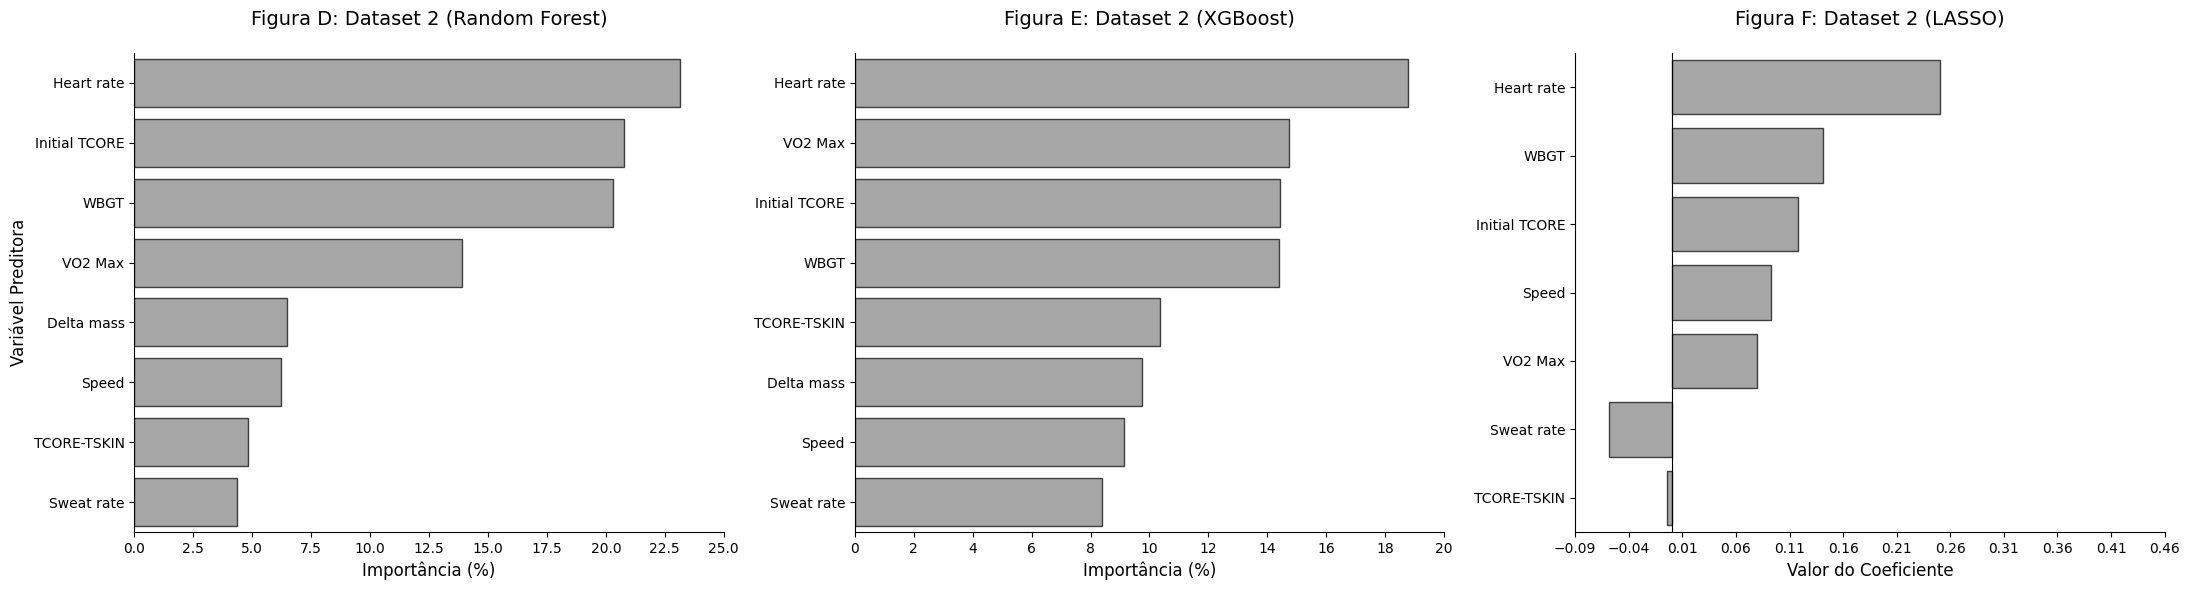

In [44]:
# Mapeamento de nomes (definido uma vez para ser usado em todos os gráficos)
mapa_de_nomes = {
    'Heart_rate_bpm': 'Heart rate',
    'WBGT_C': 'WBGT',
    'Initial_TCORE_C': 'Initial TCORE',
    'VO2MAX_mLkg1min1': 'VO2 Max',
    'Mean_TSKIN_C': 'Mean TSKIN',
    'Speed_kmh1': 'Speed',
    'Delta_mass_': 'Delta mass',
    'Sweat_rate_Lh1': 'Sweat rate',
    'Body_mass_kg': 'Body mass',
    'TCORE__TSKIN_C': 'TCORE-TSKIN'
}

# Dados para o Gráfico A (Random Forest)
importances_rf = (best_rf_regressor.feature_importances_) * 100
feature_names_rf = X2.columns
rf_importance_df = pd.DataFrame({
    'Feature': feature_names_rf,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)
rf_importance_df['Feature'] = rf_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico B (XGBoost)
importances_xgb = (best_xgb_regressor.feature_importances_) * 100
feature_names_xgb = X3.columns
xgb_importance_df = pd.DataFrame({
    'Feature': feature_names_xgb,
    'Importance': importances_xgb
}).sort_values(by='Importance', ascending=False).round(2)
xgb_importance_df['Feature'] = xgb_importance_df['Feature'].map(mapa_de_nomes)

# Dados para o Gráfico C (LASSO)
coefficients_lasso = best_lasso_regressor_pipeline.named_steps['lasso'].coef_
feature_names_lasso = X4.columns
lasso_coef_df = pd.DataFrame({
    'Feature': feature_names_lasso,
    'Coefficient': coefficients_lasso
}).sort_values(by='Coefficient', key=abs, ascending=False)
lasso_coef_nonzero_df = lasso_coef_df[lasso_coef_df['Coefficient'] != 0]
lasso_coef_nonzero_df['Feature'] = lasso_coef_nonzero_df['Feature'].map(mapa_de_nomes)


# --- 2. CRIAÇÃO DO PAINEL COM 3 GRÁFICOS (SUBPLOTS) ---
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# --- Gráfico A: Random Forest ---
sns.barplot(x='Importance', y='Feature', data=rf_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[0])
axes[0].set_title('Figura D: Dataset 2 (Random Forest)', fontsize=14, pad=20)
axes[0].set_xlabel('Importância (%)', fontsize=12)
axes[0].set_ylabel('Variável Preditora', fontsize=12)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].set_xlim(0, 25)
axes[0].set_xticks(np.arange(0, 26, 2.5))

# --- Gráfico B: XGBoost ---
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[1])
axes[1].set_title('Figura E: Dataset 2 (XGBoost)', fontsize=14, pad=20)
axes[1].set_xlabel('Importância (%)', fontsize=12)
axes[1].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].set_xlim(0, 20)
axes[1].set_xticks(np.arange(0, 22, 2))


# --- Gráfico C: LASSO ---
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef_nonzero_df, edgecolor='black', color='gray', width=0.8, alpha=0.7, ax=axes[2])
axes[2].set_title('Figura F: Dataset 2 (LASSO)', fontsize=14, pad=20)
axes[2].set_xlabel('Valor do Coeficiente', fontsize=12)
axes[2].set_ylabel('') # Remove o rótulo Y para um visual mais limpo
axes[2].axvline(0, color='black', linewidth=0.8)
axes[2].set_xlim(-0.09, 0.4)
axes[2].set_xticks(np.arange(-0.09, 0.5, 0.05))
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)


# --- 3. FINALIZAÇÃO E EXIBIÇÃO ---

# Ajusta o layout para evitar sobreposição de títulos e rótulos
plt.tight_layout()

# Salva a figura inteira contendo os três gráficos
#plt.savefig('graficos_dataset2_modelos_comparativo2.png', dpi=300, bbox_inches='tight')

# Mostra o resultado final
plt.show()